Загрузка данных.

Данные взяты с сайта kaggle
[банковские транзакции](https://www.kaggle.com/datasets/shivamb/bank-customer-segmentation)

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/bank_clients_transactions.csv')

df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


Приведение столбцов к стилю camel_case

In [ ]:
# Функция для преобразования в camelCase
def to_camel_case(s):
    parts = s.split('_')
    return parts[0].lower() + ''.join(part.capitalize() for part in parts[1:])

df.columns = [to_camel_case(col) for col in df.columns]

print(df.columns)

Index(['transactionid', 'customerid', 'customerdob', 'custgender',
       'custlocation', 'custaccountbalance', 'transactiondate',
       'transactiontime', 'transactionamount (inr)'],
      dtype='object')


Приведение типов данных

In [ ]:
# Приведение столбца customerdob к типу datetime с обработкой ошибок
df['customerdob'] = pd.to_datetime(df['customerdob'], format='%d/%m/%y', errors='coerce')

print(df['customerdob'])
print(df.dtypes)

0         1994-01-10
1         2057-04-04
2         1996-11-26
3         1973-09-14
4         1988-03-24
             ...    
1048562   1990-04-08
1048563   1992-02-20
1048564   1989-05-18
1048565   1978-08-30
1048566   1984-03-05
Name: customerdob, Length: 1048567, dtype: datetime64[ns]
transactionid                      object
customerid                         object
customerdob                datetime64[ns]
custgender                         object
custlocation                       object
custaccountbalance                float64
transactiondate                    object
transactiontime                     int64
transactionamount (inr)           float64
dtype: object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   transactionid            1048567 non-null  object        
 1   customerid               1048567 non-null  object        
 2   customerdob              987831 non-null   datetime64[ns]
 3   custgender               1047467 non-null  object        
 4   custlocation             1048416 non-null  object        
 5   custaccountbalance       1046198 non-null  float64       
 6   transactiondate          1048567 non-null  object        
 7   transactiontime          1048567 non-null  int64         
 8   transactionamount (inr)  1048567 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 72.0+ MB


Выполняем предобработку данных.
- Избавляемся от выбросов

In [ ]:
# Функция для удаления выбросов на основе IQR
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Список числовых столбцов, для которых нужно удалить выбросы
numeric_columns = ['customerdob', 'custaccountbalance','transactiontime','transactionamount (inr)']

# Удаляем выбросы
cleaned_df = remove_outliers_iqr(df, numeric_columns)

# Выводим очищенные данные
print(cleaned_df)
df = cleaned_df

        transactionid customerid customerdob custgender   custlocation  \
0                  T1   C5841053  1994-01-10          F     JAMSHEDPUR   
2                  T3   C4417068  1996-11-26          F         MUMBAI   
4                  T5   C9031234  1988-03-24          F    NAVI MUMBAI   
5                  T6   C1536588  1972-10-08          F       ITANAGAR   
6                  T7   C7126560  1992-01-26          F         MUMBAI   
...               ...        ...         ...        ...            ...   
1048561      T1048562   C1034220  1992-11-19          M      BANGALORE   
1048562      T1048563   C8020229  1990-04-08          M      NEW DELHI   
1048563      T1048564   C6459278  1992-02-20          M         NASHIK   
1048565      T1048566   C6420483  1978-08-30          M  VISAKHAPATNAM   
1048566      T1048567   C8337524  1984-03-05          M           PUNE   

         custaccountbalance transactiondate  transactiontime  \
0                  17819.05          2/8/16    

Поиск дублей и пропусков в данных
- Избавляемся от пропусков

In [ ]:
# Удаление дубликатов
df = df.drop_duplicates()

# Удаление строк с пропусками
df = df.dropna()

Исследовательский анализ данных

Находим количество уникальных клиентов

In [ ]:
# Находим количество уникальных клиентов по 'customerid'
unique_customers_count = df['customerid'].nunique()

print(unique_customers_count)

630670


Вывод: Количество уникальных клиентов 630670

Находим количество совершённых транзакций

In [ ]:
# Находим количество транзакций по 'transactionid'
transaction_count = df['transactionid'].count()

print(transaction_count)

709370


Вывод: Количество совершённых транзакций 709370

Находим сколько в среднем транзакций приходится на одного клиента

In [ ]:
# Вычисляем среднее количество транзакций на одного клиента
average_transactions_per_customer = transaction_count / unique_customers_count

print(average_transactions_per_customer)

1.1247879239538903


Вывод: Количество траезакций в среднем на одного клиента 1,125

Изучим распределение и размах величин CustAccountBalance и TransactionAmount

Статистика для CustAccountBalance:
 count    709370.000000
mean      20471.699995
std       24672.741618
min           0.000000
25%        3166.880000
50%       10944.940000
75%       28047.910000
max      114760.010000
Name: custaccountbalance, dtype: float64

Статистика для TransactionAmount:
 count    709370.000000
mean        500.869272
std         521.583986
min           0.000000
25%         108.000000
50%         300.000000
75%         700.000000
max        2305.000000
Name: transactionamount (inr), dtype: float64


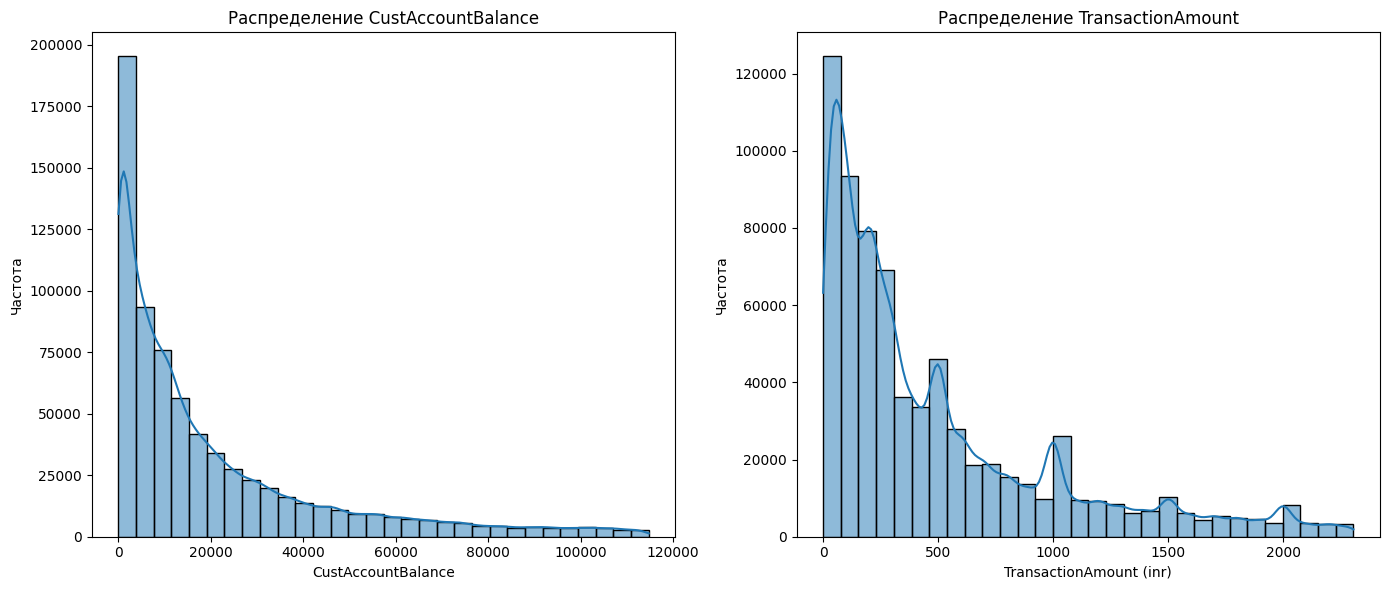

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Описательная статистика для custaccountbalance
account_balance_stats = df['custaccountbalance'].describe()

# Описательная статистика для transactionamount
transaction_amount_stats = df['transactionamount (inr)'].describe()

# Вывод описательной статистики
print("Статистика для CustAccountBalance:\n", account_balance_stats)
print("\nСтатистика для TransactionAmount:\n", transaction_amount_stats)

# Визуализация распределения
plt.figure(figsize=(14, 6))

# Гистограмма для CustAccountBalance
plt.subplot(1, 2, 1)
sns.histplot(df['custaccountbalance'], bins=30, kde=True)
plt.title('Распределение CustAccountBalance')
plt.xlabel('CustAccountBalance')
plt.ylabel('Частота')

# Гистограмма для TransactionAmount
plt.subplot(1, 2, 2)
sns.histplot(df['transactionamount (inr)'], bins=30, kde=True)
plt.title('Распределение TransactionAmount')
plt.xlabel('TransactionAmount (inr)')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

Комментарии статистики.

CustAccountBalance:
Квартильные значения:
   - 25% клиентов имеют баланс менее 3,309.10, что может указывать на более низкий уровень финансового благосостояния у части клиентов.
   - 50% (медиана) клиентов имеют баланс менее 11,359.95.
   - 75% клиентов имеют баланс менее 29,629.49, что указывает на то, что большая часть клиентов имеет баланс ниже 30,000.
   
TransactionAmount:
Квартильные значения:
   - 25% транзакций ниже 110.00, что говорит о большом количестве мелких транзакций.
   - 50% (медиана) транзакций ниже 300.00.
   - 75% транзакций ниже 715.00, что показывает, что большинство транзакций имеют размеры ниже этой цифры.

ВЫВОД:
Высокая вариативность как в балансах, так и в суммах транзакций. Наличие клиентов с нулевыми значениями указывает на необходимость дальнейшего анализа.

Изучаем и визуализируем возраст клиентов

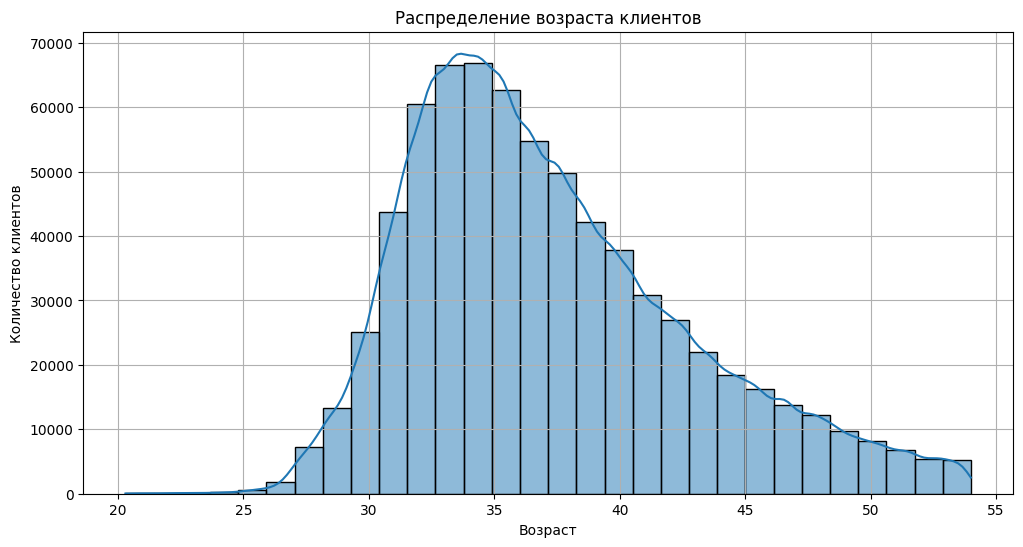

count    709370.000000
mean         37.220453
std           5.581381
min          20.298426
25%          33.092402
50%          36.128679
75%          40.465435
max          53.993155
Name: age, dtype: float64


In [ ]:
# Вычисляем возраст клиентов в годах
df['age'] = (pd.Timestamp.now() - df['customerdob']).dt.days / 365.25

# Визуализация распределения возраста
plt.figure(figsize=(12, 6))
sns.histplot(df['age'], bins=30, kde=True)  # Гистограмма с кривой плотности
plt.title('Распределение возраста клиентов')
plt.xlabel('Возраст')
plt.ylabel('Количество клиентов')
plt.grid()
plt.show()

# Статистические характеристики возраста
print(df['age'].describe())

Выводы: 25-й и 75-й процентиль (32.8 и 39.8 лет соответственно) показывают, что половина клиентов находится в возрасте от 32.8 до 39.8 лет.

Изучаем и визуализируем пол клиентов

<ipython-input-12-de90bae9ab52>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=custgender_counts.index, y=custgender_counts.values, palette='pastel')


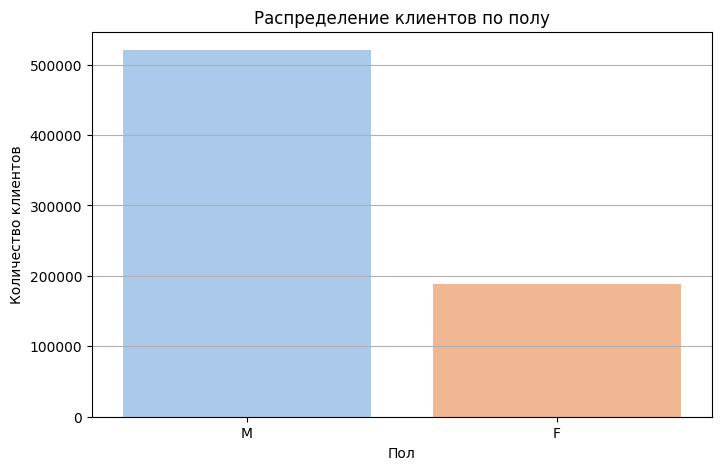

custgender
M    520756
F    188614
Name: count, dtype: int64


In [ ]:
custgender_counts = df['custgender'].value_counts()

# Визуализация распределения по полу
plt.figure(figsize=(8, 5))
sns.barplot(x=custgender_counts.index, y=custgender_counts.values, palette='pastel')
plt.title('Распределение клиентов по полу')
plt.xlabel('Пол')
plt.ylabel('Количество клиентов')
plt.grid(axis='y')
plt.show()

# Вывод статистики по полу
print(custgender_counts)

Вывод: Значительное большинство клиентов составляют мужчины 520756, что составляет примерно 74% от общего числа.

Изучаем и визуализируем место жительства клиентов

<ipython-input-13-47b77b012ba7>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=location_df, x='custlocation', y='customer_count', palette='viridis')


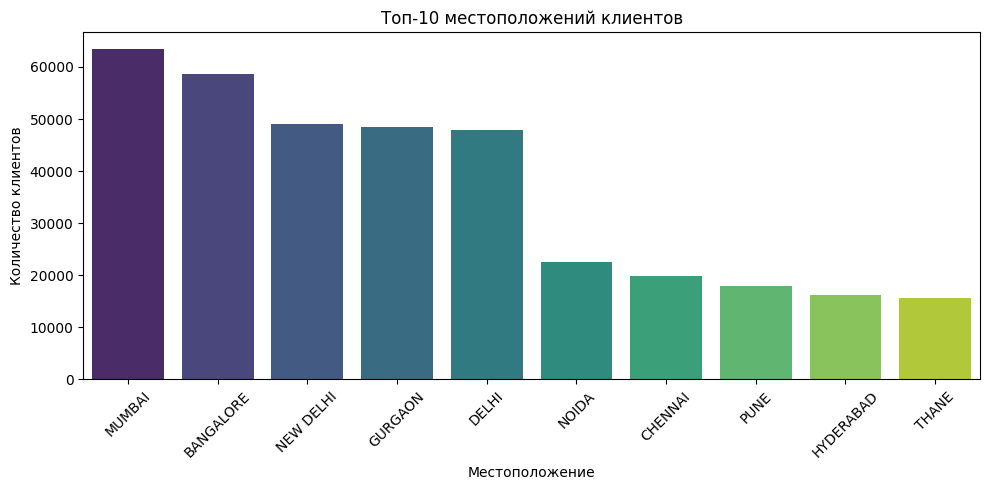

In [ ]:
# Подсчет количества клиентов по местоположению
location_counts = df['custlocation'].value_counts().head(10)  # Топ-10 местоположений

# Создание DataFrame для визуализации
location_df = pd.DataFrame(location_counts).reset_index()
location_df.columns = ['custlocation', 'customer_count']

# Визуализация
plt.figure(figsize=(10, 5))
sns.barplot(data=location_df, x='custlocation', y='customer_count', palette='viridis')
plt.xticks(rotation=45)  # Поворот подписей по оси X
plt.title('Топ-10 местоположений клиентов')
plt.xlabel('Местоположение')
plt.ylabel('Количество клиентов')
plt.tight_layout()  # Автоматическая подгонка графика
plt.show()

Вывод: 5 городов являются явными лидерами с количеством клиентов около 50тыс. Первый в списке Мумбай 65тыс.


Смотрим динамику транзакций по дате (в кол-ве TransactionID)

<ipython-input-14-e5ee80450ffc>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['transactiondate'] = pd.to_datetime(df['transactiondate'])


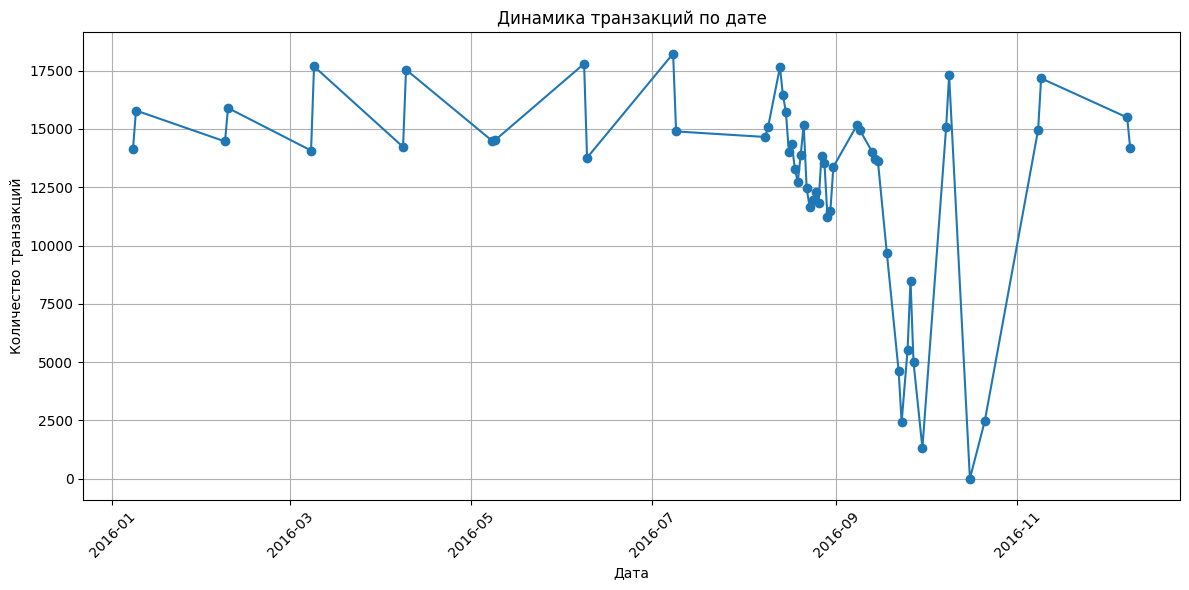

In [ ]:
# Преобразуем столбец 'transactiondate' в формат даты
df['transactiondate'] = pd.to_datetime(df['transactiondate'])

# Группируем по дате и считаем количество TransactionID
transaction_trend = df.groupby('transactiondate')['transactionid'].count().reset_index()

# Переименовываем столбцы для удобства
transaction_trend.columns = ['transactiondate', 'transaction_count']

# Визуализируем данные
plt.figure(figsize=(12, 6))
plt.plot(transaction_trend['transactiondate'], transaction_trend['transaction_count'], marker='o')
plt.title('Динамика транзакций по дате')
plt.xlabel('Дата')
plt.ylabel('Количество транзакций')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Вывод: В целом количество транзакций стабильно и по большинству месяцев составляет в среднем 15000-17000. Провал в сентябре до 11000 и явный провал в октябре до 2500-5000.

Рассмотрим динамику транзакций по дате (в сумме TransactionAmount)

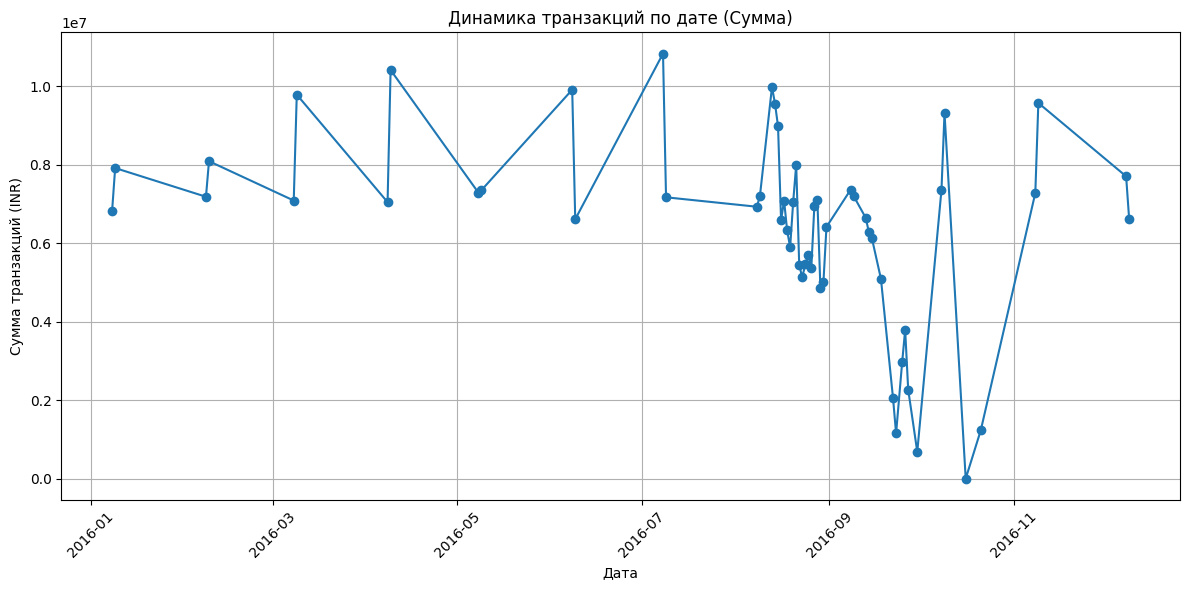

In [ ]:
# Преобразуем столбец 'transactiondate' в формат даты
df['transactiondate'] = pd.to_datetime(df['transactiondate'])

# Группируем по дате и суммируем transactionamount
transaction_trend = df.groupby('transactiondate')['transactionamount (inr)'].sum().reset_index()

# Переименовываем столбцы для удобства
transaction_trend.columns = ['transactiondate', 'total_transaction_amount']

# Визуализируем данные
plt.figure(figsize=(12, 6))
plt.plot(transaction_trend['transactiondate'], transaction_trend['total_transaction_amount'], marker='o')
plt.title('Динамика транзакций по дате (Сумма)')
plt.xlabel('Дата')
plt.ylabel('Сумма транзакций (INR)')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Вывод: График сумм транзакций повторяет предыдущий график, с провалами в сентябре и октябре.

Разбиваем клиентов на корзины по возрасту и определяем самую платежеспособную группу

<ipython-input-16-e9a9b51806fc>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_summary = df.groupby('age_group')['transactionamount (inr)'].sum().reset_index()
<ipython-input-16-e9a9b51806fc>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_group_summary, x='age_group', y='transactionamount (inr)', palette='viridis')


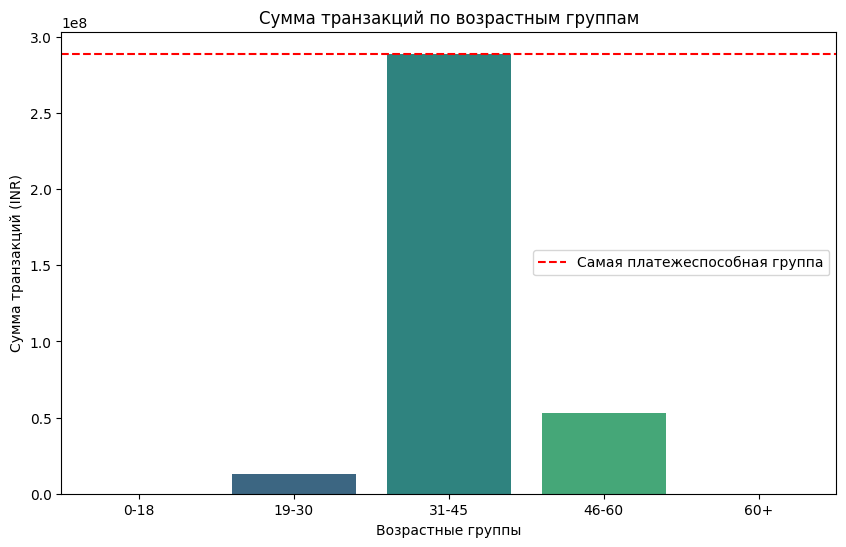

Самая платежеспособная группа: 31-45, сумма: 288903342.01 INR


In [ ]:
# Создание столбца с возрастом
df['age'] = (pd.to_datetime('today') - pd.to_datetime(df['customerdob'])).dt.days // 365

# Определение возрастных групп
bins = [0, 18, 30, 45, 60, 100]  # Возрастные корзины
labels = ['0-18', '19-30', '31-45', '46-60', '60+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Группировка по возрастным группам и подсчет суммы транзакций
age_group_summary = df.groupby('age_group')['transactionamount (inr)'].sum().reset_index()

# Определение самой платежеспособной группы
most_profitable_group = age_group_summary.loc[age_group_summary['transactionamount (inr)'].idxmax()]

# Визуализация
plt.figure(figsize=(10, 6))
sns.barplot(data=age_group_summary, x='age_group', y='transactionamount (inr)', palette='viridis')
plt.title('Сумма транзакций по возрастным группам')
plt.xlabel('Возрастные группы')
plt.ylabel('Сумма транзакций (INR)')
plt.axhline(y=most_profitable_group['transactionamount (inr)'], color='r', linestyle='--', label='Самая платежеспособная группа')
plt.legend()
plt.show()

print(f'Самая платежеспособная группа: {most_profitable_group["age_group"]}, сумма: {most_profitable_group["transactionamount (inr)"]} INR')


Вывод: Самая платежеспособная группа клиентов находится в возрастном промежутке 31-45 лет

Смотрим распределение транзакций по локации и выводим топ 10 по количеству транзакций/сумме транзакций

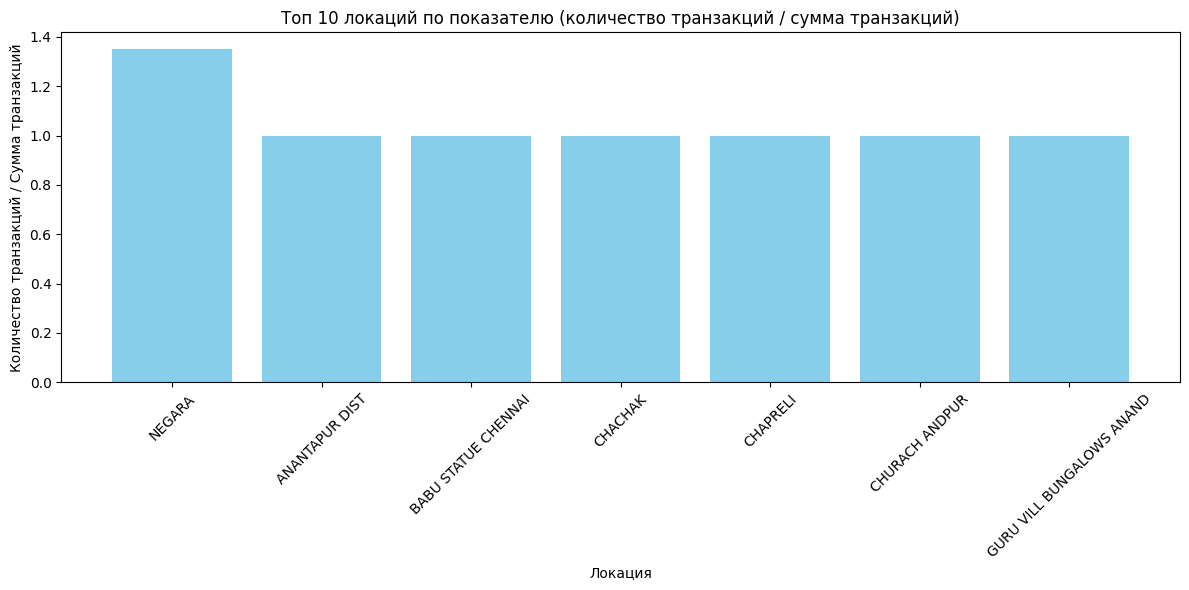

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Группируем по локации, считаем количество транзакций и сумму транзакций
summary = df.groupby('custlocation').agg(
    transaction_count=('transactionid', 'count'),
    total_amount=('transactionamount (inr)', 'sum')
).reset_index()

# Вычисляем показатель: количество транзакций / сумма транзакций
summary['ratio'] = summary['transaction_count'] / summary['total_amount']

# Сортируем по показателю и берем топ 10
top_10 = summary.nlargest(10, 'ratio')

# Построение столбчатой диаграммы
plt.figure(figsize=(12, 6))
plt.bar(top_10['custlocation'], top_10['ratio'], color='skyblue')
plt.xlabel('Локация')
plt.ylabel('Количество транзакций / Сумма транзакций')
plt.title('Топ 10 локаций по показателю (количество транзакций / сумма транзакций)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Вывод: Локация NEGARA явный лидер по коэффициенту равному количество транзакций/сумма транзакций

Смотрим распределение времени транзакции (TransactionTime). Переводим из миллисекунд в минуты

In [ ]:
# Преобразуем столбец 'transactiontime' из миллисекунд в минуты
df['transactiontime_minutes'] = df['transactiontime'] / 60000

# Выводим результат
print(df[['transactiontime', 'transactiontime_minutes']].head())

   transactiontime  transactiontime_minutes
0           143207                 2.386783
2           142712                 2.378533
4           181156                 3.019267
5           173940                 2.899000
6           173806                 2.896767


Вывод: Обычное время проведения транзакции 2-3 минуты

ВЫВОДЫ В ФОРМАТЕ НУМИРОВАННОГО СПИСКА
1. Количество уникальных клиентов 630670
2. Количество совершённых транзакций 709370
3. Количество транзакций в среднем на одного клиента 1,125
4. Высокая вариативность как в балансах, так и в суммах транзакций. Наличие клиентов с нулевыми значениями указывает на необходимость дальнейшего анализа.
5. 25-й и 75-й процентиль (32.8 и 39.8 лет соответственно) показывают, что половина клиентов находится в возрасте от 32.8 до 39.8 лет.
6. Значительное большинство клиентов составляют мужчины 520756, что составляет примерно 74% от общего числа.
7. 5 городов являются явными лидерами с количеством клиентов около 50тыс. Первый в списке Мумбай 65тыс.
8. В целом количество транзакций стабильно и по большинству месяцев составляет в среднем 15000-17000. Провал в сентябре до 11000 и явный провал в октябре до 2500-5000.
9. График сумм транзакций повторяет предыдущий график, с провалами в сентябре и октябре.
10.  Самая платежеспособная группа клиентов находится в возрастном промежутке 31-45 лет
11. Обычное время проведения транзакции 2-3 минуты